In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.options.display.max_rows = 10000

In [3]:
df = pd.read_csv('./Data/Milano_with_score.csv', header=0, index_col=0)

/Users/valerio/anaconda3/envs/webvalley19/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (11,12,19,41,42,43,50,51,133,137) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,ana:age,ana:education,ana:gender,ana:standardised_visits,ana:visits_carried_out,ana_far:antiaggregants,ana_far:antidiabetics,ana_far:antihypertensive,ana_far:att_atc1,ana_far:att_atc2,...,patient_id,score,ult_tsa:imt_cc_average_left,ult_tsa:imt_cc_average_right,ult_tsa:imt_cc_max_left,ult_tsa:imt_cc_max_right,ult_tsa:left_plaque_yn,ult_tsa:right_plaque_yn,visit:visit,ScoreClass
0,72,3,0,2,2,1,0,1,B01AC05,-1,...,86,18.261460,707.0,641.0,887.00,721.0,0,0,0,3
1,68,5,1,2,2,0,0,1,-1,-1,...,33,3.306981,835.0,592.0,964.00,722.0,0,0,0,2
2,53,4,0,2,2,1,0,1,B01AC06,-1,...,270,3.875747,573.0,957.0,0.63,1026.0,0,0,0,2
3,50,6,0,2,2,0,0,1,-1,-1,...,10,2.872045,656.0,489.0,712.00,556.0,0,0,0,2
4,59,6,0,2,2,0,0,1,-1,-1,...,31,6.301846,526.0,609.0,587.00,644.0,0,0,0,3


In [40]:
genetics = pd.read_excel('./Data/DBPLIC1_wScoreCLass.xlsx', header=0)

In [41]:
genetics.head()

,Unnamed: 0,cod_pz,BPIFB4 rs2070325,ST6GAL1_rs11710456,SLC2A2_rs5400,CD36_rs1761667,CD36_rs1049673,ZC3H10_rs61732294,HDAC1_rs1741981,HDAC1_rs1741981_CCeCTvsTT,...,rs_9420907_1e2vs3,rs_8105767,rs_8105767_1vs2e3,rs_8105767_1e2vs3,rs_755017,rs_755017_1vs2e3,rs_755017_1e2vs3,SCORE,Score,ScoreClass
0,0,1,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,2.276228,NaN,3.0
1,1,2,NaN,NaN,3.0,2.0,2.0,1.0,1.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.064786,NaN,1.0
2,2,3,3.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,9.269904,NaN,4.0
3,3,4,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
4,4,5,2.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.093968,NaN,1.0


In [42]:
genetics.drop('Unnamed: 0', inplace=True, axis=1)

In [43]:
genetics.columns[genetics.columns.str.startswith('Score')]

Index(['Score', 'ScoreClass'], dtype='object')

In [44]:
genetics.drop(['Score', 'SCORE', 'ScoreClass'], inplace=True, axis=1)

In [45]:
visit_0 = df[df['visit:visit'] == 0]

In [46]:
visit_0.shape

(1445, 230)

In [47]:
visit_0.columns[visit_0.columns.str.startswith('patient')]

Index(['patient_id'], dtype='object')

In [48]:
visit_0.head()

,ana:age,ana:education,ana:gender,ana:standardised_visits,ana:visits_carried_out,ana_far:antiaggregants,ana_far:antidiabetics,ana_far:antihypertensive,ana_far:att_atc1,ana_far:att_atc2,...,patient_id,score,ult_tsa:imt_cc_average_left,ult_tsa:imt_cc_average_right,ult_tsa:imt_cc_max_left,ult_tsa:imt_cc_max_right,ult_tsa:left_plaque_yn,ult_tsa:right_plaque_yn,visit:visit,ScoreClass
0,72,3,0,2,2,1,0,1,B01AC05,-1,...,86,18.261460,707.0,641.0,887.00,721.0,0,0,0,3
1,68,5,1,2,2,0,0,1,-1,-1,...,33,3.306981,835.0,592.0,964.00,722.0,0,0,0,2
2,53,4,0,2,2,1,0,1,B01AC06,-1,...,270,3.875747,573.0,957.0,0.63,1026.0,0,0,0,2
3,50,6,0,2,2,0,0,1,-1,-1,...,10,2.872045,656.0,489.0,712.00,556.0,0,0,0,2
4,59,6,0,2,2,0,0,1,-1,-1,...,31,6.301846,526.0,609.0,587.00,644.0,0,0,0,3


In [49]:
patients_id = set(visit_0['patient_id'].values)
code_pz = set(genetics['cod_pz'].values)

In [50]:
patients_id.difference(code_pz)

set()

In [52]:
len(code_pz.difference(patients_id))

1161

In [53]:
genetics.shape

(2606, 105)

In [54]:
visit_0.merge(genetics, left_on='patient_id', right_on='cod_pz').shape

(1445, 335)

In [60]:
genetics.drop(genetics.columns[genetics.columns.str.contains('VS') | 
                               genetics.columns.str.contains('vs') | 
                               genetics.columns.str.contains('1_2e3')], inplace=True, axis=1)

In [61]:
genetics.shape

(2606, 62)

In [68]:
gen_filter = genetics[genetics.columns[genetics.var() > 0.05]]

In [71]:
gen_filter.dtypes

cod_pz                       int64
BPIFB4 rs2070325           float64
ST6GAL1_rs11710456         float64
SLC2A2_rs5400              float64
CD36_rs1761667             float64
CD36_rs1049673             float64
ZC3H10_rs61732294          float64
HDAC1_rs1741981            float64
HDAC3_rs2547547            float64
HDAC3_rs2530223            float64
SLC16A7_rs995343           float64
PCSK9_rs7552841            float64
GCK_rs4607517              float64
GCK_rs3757840              float64
GCKR_rs1260326             float64
P2RX7_rs1718119_SNP1       float64
P2RX7_rs11065464_SNP2      float64
Fractalkine_R_SNP_V249I    float64
Fractalkine_R_SNP_T280M    float64
Adiponectin_SNP_276        float64
Resistin_SNP_420           float64
TLR4_SNP_299               float64
TLR4_SNP_399               float64
VISFATIN_SNP_1001          float64
TLR5_SNP_1174              float64
RAGE_SNP_374               float64
BDNF_SNP_V66M              float64
ApoE_Alleli                float64
PCSK9_SNP_I474V     

In [75]:
gen_filter.to_csv('./Data/genetics_clean_near_zero_var_filter.csv')

In [74]:
gen_filter.fillna(-1, inplace=True)
gen_filter.head()

,cod_pz,BPIFB4 rs2070325,ST6GAL1_rs11710456,SLC2A2_rs5400,CD36_rs1761667,CD36_rs1049673,ZC3H10_rs61732294,HDAC1_rs1741981,HDAC3_rs2547547,HDAC3_rs2530223,...,rs2967374,rs1801075,rs11125529,rs_1799945,rs_2736100,rs_10936599,rs_7675998,rs_9420907,rs_8105767,rs_755017
0,1,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,3.0,...,2.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
1,2,-1.0,-1.0,3.0,2.0,2.0,1.0,1.0,1.0,3.0,...,1.0,1.0,1.0,-1.0,-1.0,2.0,-1.0,-1.0,1.0,1.0
2,3,3.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,3.0,...,2.0,2.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
3,4,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0
4,5,2.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [10]:
feature_categories = pd.Series(df.columns.values).apply(lambda v: '{}:'.format(v.split(':')[0])).unique()

In [11]:
feature_categories

array(['ana:', 'ana_far:', 'ana_fis:', 'ana_pat:', 'eco_art:', 'end:',
       'esa_obi:', 'lab:', 'lun_bod_sca:', 'patient_id:', 'score:',
       'ult_tsa:', 'visit:'], dtype=object)

## Statistics on Scores

In [12]:
from matplotlib import pyplot as plt

%matplotlib inline

In [18]:
df[df.columns[df.columns.str.startswith('score')]].head()

,score
0,18.261460
1,3.306981
2,3.875747
3,2.872045
4,6.301846


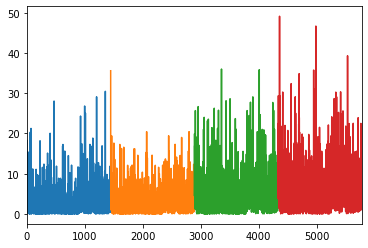

In [19]:
visits = df.groupby('visit:visit')

for v, visit in visits:
    visit['score'].plot()

In [6]:
_LABELS = {
    'ana': 'Anagrafica',
    'ana_fis': 'Anamnesi Fisiologica',
    'ana_pat': 'Anamnesi Patologica',
    'ana_far': 'Anamnesi Farmacologica',
    'esa_obi': 'Esame Obiettivo',
    'lab': 'Laboratorio',
    'ult_tsa': 'Ultrasound Tsa',
    'end': 'Endotelio',
    'lun_bod_sca': 'Lunar Body Scan',
    'eco_art': 'Ecodoppler Arti'
}

In [7]:
list(_LABELS.keys())

['ana',
 'ana_fis',
 'ana_pat',
 'ana_far',
 'esa_obi',
 'lab',
 'ult_tsa',
 'end',
 'lun_bod_sca',
 'eco_art']

In [8]:
feature_categories = list(feature_categories)[2:]  # removing subject id, visit

In [9]:
iter_cats = iter(feature_categories)

In [10]:
cat = next(iter_cats)
sub_df = df[df.columns[df.columns.str.startswith((cat, 'visit'))]]
print(_LABELS[cat[:-1]])
sub_df.groupby('visit').agg(['median', 'mean', 'min', 'max', 'count', 'nunique', lambda c: c.dtypes]).transpose()

Anagrafica


visit                                    1         2         3         4
ana:visits_carried_out  median           2         2         2         2
                        mean       2.01107   2.01107   2.01107   2.01107
                        min              2         2         2         2
                        max              5         5         5         5
                        count         1445      1445      1445      1445
                        nunique          4         4         4         4
                        <lambda>     int64     int64     int64     int64
ana:standardised_visits median           2         2         2         2
                        mean             2         2         2         2
                        min              2         2         2         2
                        max              2         2         2         2
                        count         1445      1445      1445      1445
                        nunique          1         1         1         1
                        <lambda>     int64     int64     int64     int64
ana:gender              median           1         1         1         1
                        mean      0.589619  0.589619  0.589619  0.589619
                        min              0         0         0         0
                        max              1         1         1         1
                        count         1445      1445      1445      1445
                        nunique          2         2         2         2
                        <lambda>     int64     int64     int64     int64
ana:education           median           5         5         5         5
                        mean       4.82284   4.82353   4.81869   4.81869
                        min              2         2         2         2
                        max              6         6         6         6
                        count         1445      1445      1445      1445
                        nunique          5         5         5         5
                        <lambda>     int64     int64     int64     int64

In [11]:
cat = next(iter_cats)
sub_df = df[df.columns[df.columns.str.startswith((cat, 'visit'))]]
print(_LABELS[cat[:-1]])
sub_df.groupby('visit').agg(['mean', 'min', 'max', 'median', 'count', 'nunique', lambda c: c.dtypes]).transpose()

Anamnesi Fisiologica


visit                                                1         2         3  \
ana_fis:menarche                    mean       7.03391   7.03529   7.03529   
                                    min             -1        -1        -1   
                                    max             18        18        18   
                                    median          11        11        11   
                                    count         1445      1445      1445   
                                    nunique         12        12        12   
                                    <lambda>   float64   float64   float64   
ana_fis:pregnancies_n               mean      0.566782  0.572318  0.588235   
                                    min             -1        -1        -1   
                                    max              9         9         9   
                                    median           1         1         1   
                                    count         1445      1445      1445   
                                    nunique         11        11        11   
                                    <lambda>   float64   float64   float64   
ana_fis:completed_pregnancies       mean            -1        -1        -1   
                                    min             -1        -1        -1   
                                    max             -1        -1        -1   
                                    median          -1        -1        -1   
                                    count         1445      1445      1445   
                                    nunique          1         1         1   
                                    <lambda>   float64   float64   float64   
ana_fis:menopause                   mean       20.2436   21.6464   24.3571   
                                    min             -1        -1        -1   
                                    max             60        60        65   
                                    median          -1        -1        33   
                                    count         1445      1445      1445   
                                    nunique         32        32        33   
                                    <lambda>   float64   float64   float64   
ana_fis:induced_menopause           mean     -0.513495 -0.474048 -0.420761   
                                    min             -1        -1        -1   
                                    max              1         1         1   
                                    median          -1        -1        -1   
                                    count         1445      1445      1445   
                                    nunique          3         3         3   
                                    <lambda>     int64     int64     int64   
ana_fis:menopause_age               mean            -1        -1        -1   
                                    min             -1        -1        -1   
                                    max             -1        -1        -1   
                                    median          -1        -1        -1   
                                    count         1445      1445      1445   
                                    nunique          1         1         1   
                                    <lambda>   float64   float64   float64   
ana_fis:alcohols                    mean       3.02076   3.02907   2.99931   
                                    min             -1        -1        -1   
                                    max              4         4         4   
                                    median           3         3         3   
                                    count         1445      1445      1445   
                                    nunique          4         4         4   
                                    <lambda>   float64   float64   float64   
ana_fis:b_wine                      mean       0.39299     0.282  0.407093   
                      

In [12]:
cat = next(iter_cats)
sub_df = df[df.columns[df.columns.str.startswith((cat, 'visit'))]]
print(_LABELS[cat[:-1]])
sub_df.groupby('visit').agg(['mean', 'min', 'max', 'median', 'count', 'nunique', lambda c: c.dtypes]).transpose()

Anamnesi Patologica


visit                                                      1            2  \
ana_pat:chd                            mean       0.00207612            0   
                                       min                 0            0   
                                       max                 1            0   
                                       median              0            0   
                                       count            1445         1445   
                                       nunique             2            1   
                                       <lambda>        int64        int64   
ana_pat:chd_profile                    mean          2.02353      2.02353   
                                       min                 2            2   
                                       max                 5            5   
                                       median              2            2   
                                       count            1445         1445   
                                       nunique             4            4   
                                       <lambda>        int64        int64   
ana_pat:remote_chd                     mean       0.00207612   0.00207612   
                                       min                 0            0   
                                       max                 1            1   
                                       median              0            0   
                                       count            1445         1445   
                                       nunique             2            2   
                                       <lambda>        int64        int64   
ana_pat:angina                         mean         0.017301   0.00415225   
                                       min                 0            0   
                                       max                 1            1   
                                       median              0            0   
                                       count            1445         1445   
                                       nunique             2            2   
                                       <lambda>        int64        int64   
ana_pat:angina_profile                 mean          2.09689      2.09689   
                                       min                 2            2   
                                       max                 6            6   
                                       median              2            2   
                                       count            1445         1445   
                                       nunique             5            5   
                                       <lambda>        int64        int64   
ana_pat:remote_angina                  mean         0.017301    0.0214533   
                                       min                 0            0   
                                       max                 1            1   
                                       median              0            0   
                                       count            1445         1445   
                                       nunique             2            2   
                                       <lambda>        int64        int64   
ana_pat:silent_ischaemia               mean       0.00761246   0.00346021   
                                       min                 0            0   
                                       max                 1            1   
                                       median              0            0   
                                       count            1445         1445   
                                       nunique             2            2   
                                       <lambda>        int64        int64   
ana_pat:ischaemia_silent_profile       mean          2.05329      2.05329   
                                       min                 2            2

In [13]:
cat = next(iter_cats)
sub_df = df[df.columns[df.columns.str.startswith((cat, 'visit'))]]
print(_LABELS[cat[:-1]])
sub_df.groupby('visit').agg(['mean', 'min', 'max', 'median', 'count', 'nunique', lambda c: c.dtypes]).transpose()

Anamnesi Farmacologica


visit                                      1          2          3          4
ana_far:ns_drugs         mean       0.577855   0.613841   0.702422   0.797924
                         min               0          0          0          0
                         max               1          1          1          1
                         median            1          1          1          1
                         count          1445       1445       1445       1445
                         nunique           2          2          2          2
                         <lambda>      int64      int64      int64      int64
ana_far:antihypertensive mean       0.266436   0.295502   0.389619   0.485121
                         min               0          0          0          0
                         max               1          1          1          1
                         median            0          0          0          0
                         count          1445       1445       1445       1445
                         nunique           2          2          2          2
                         <lambda>      int64      int64      int64      int64
ana_far:statins          mean       0.107958   0.179239   0.242215   0.351557
                         min               0          0          0          0
                         max               1          1          1          1
                         median            0          0          0          0
                         count          1445       1445       1445       1445
                         nunique           2          2          2          2
                         <lambda>      int64      int64      int64      int64
ana_far:fibers           mean      0.0124567  0.0186851  0.0242215  0.0276817
                         min               0          0          0          0
                         max               1          1          1          1
                         median            0          0          0          0
                         count          1445       1445       1445       1445
                         nunique           2          2          2          2
                         <lambda>      int64      int64      int64      int64
ana_far:dm_atc3          mean       -0.99654         -1         -1  -0.970934
                         min              -1         -1         -1         -1
                         max               4         -1         -1          7
                         median           -1         -1         -1         -1
                         count          1445       1445       1445       1445
                         nunique           2          1          1          6
                         <lambda>    float64    float64    float64    float64
ana_far:dm_pa3           mean      -0.995848         -1         -1  -0.971626
                         min              -1         -1         -1         -1
                         max               5         -1         -1          8
                         median           -1         -1         -1         -1
                         count          1445       1445       1445       1445
                         nunique           2          1          1          6
                         <lambda>    float64    float64    float64    float64
ana_far:antidiabetics    mean      0.0131488  0.0186851  0.0442907  0.0740484
                         min               0          0          0          0
                         max               1          1          1          1
                         median            0          0          0          0
                         count          1445       1445       1445       1445
                         nunique           2          2          2          2
                         <lambda>      int64      int64      int64      int64
ana_far:att_atc2         mean      -0.988235  -0.993772   -0.96955   -0.96955
                      

In [14]:
cat = next(iter_cats)
sub_df = df[df.columns[df.columns.str.startswith((cat, 'visit'))]]
print(_LABELS[cat[:-1]])
sub_df.groupby('visit').agg(['mean', 'min', 'max', 'median','count', 'nunique', lambda c: c.dtypes]).transpose()

Esame Obiettivo


visit                                                  1            2  \
esa_obi:weight                     mean          70.2293      70.4537   
                                   min                -1           -1   
                                   max               122        127.5   
                                   median             70           70   
                                   count            1445         1445   
                                   nunique           334          397   
                                   <lambda>      float64      float64   
esa_obi:height                     mean          1.62563      1.61532   
                                   min                -1           -1   
                                   max              1.93         1.92   
                                   median           1.62         1.62   
                                   count            1445         1445   
                                   nunique            55           55   
                                   <lambda>      float64      float64   
esa_obi:bmi_calc                   mean          26.3962      26.6359   
                                   min                -1           -1   
                                   max            46.277      47.2884   
                                   median        26.0417      26.4024   
                                   count            1445         1445   
                                   nunique          1173         1240   
                                   <lambda>      float64      float64   
esa_obi:waist                      mean          77.3384      84.3918   
                                   min                -1           -1   
                                   max               130          134   
                                   median             88           89   
                                   count            1445         1445   
                                   nunique            67           93   
                                   <lambda>      float64      float64   
esa_obi:hips                       mean           53.717      97.3699   
                                   min                -1           -1   
                                   max               142          142   
                                   median             89          102   
                                   count            1445         1445   
                                   nunique            56           69   
                                   <lambda>      float64      float64   
esa_obi:waist_hips_calc            mean       -0.0335475     0.753019   
                                   min                -1           -1   
                                   max            13.875      1.13592   
                                   median        0.73913      0.85567   
                                   count            1445         1445   
                                   nunique           449          702   
                                   <lambda>      float64      float64   
esa_obi:pa_ankle_right             mean               -1           -1   
                                   min                -1           -1   
                                   max                -1           -1   
                                   median             -1           -1   
                                   count            1445         1445   
                                   nunique             1            1   
                                   <lambda>      float64      float64   
esa_obi:pa_left_ankle              mean               -1           -1   
                                   min                -1           -1   
                                   max                -1           -1   
                                   median             -1           -1   
                                   count            1445  

In [15]:
cat = next(iter_cats)
sub_df = df[df.columns[df.columns.str.startswith((cat, 'visit'))]]
print(_LABELS[cat[:-1]])
sub_df.groupby('visit').agg(['mean', 'min', 'max', 'median', 'count', 'nunique', lambda c: c.dtypes]).transpose()

Laboratorio


visit                                       1        2         3          4
lab:hdl                     mean      55.1965  55.5156    58.645    61.7343
                            min            20       21        27         21
                            max           118      126       120        140
                            median         53       54        56         60
                            count        1445     1445      1445       1445
                            nunique        87       84        82         95
                            <lambda>    int64    int64     int64      int64
lab:tg                      mean      110.129  111.764   103.257    102.057
                            min            18       19        20         29
                            max           667      712       525        450
                            median         92       97        91         92
                            count        1445     1445      1445       1445
                            nunique       256      241       234        206
                            <lambda>    int64    int64     int64      int64
lab:apoa1                   mean      109.976  12.0844   151.085    154.816
                            min            -1       -1        -1          0
                            max           253      242       252        251
                            median        135       -1       157        153
                            count        1445     1445      1445       1445
                            nunique       135       70       136        119
                            <lambda>  float64  float64   float64    float64
lab:apob                    mean      85.3488  8.70588   118.385    105.392
                            min            -1       -1        -1          0
                            max           237      189       269        224
                            median        102       -1       115        101
                            count        1445     1445      1445       1445
                            nunique       138       64       162        124
                            <lambda>  float64  float64   float64    float64
lab:uricemia                mean           -1       -1 -0.992235    5.08792
                            min            -1       -1        -1       0.95
                            max            -1       -1       2.4          9
                            median         -1       -1        -1          5
                            count        1445     1445      1445       1445
                            nunique         1        1         6         71
                            <lambda>  float64  float64   float64    float64
lab:high                    mean           -1       -1   24.6699    20.8907
                            min            -1       -1         4         -1
                            max            -1       -1       211        409
                            median         -1       -1        21         18
                            count        1445     1445      1445       1445
                            nunique         1        1        81         72
                            <lambda>  float64  float64   float64    float64
lab:ast                     mean           -1       -1   23.3647    21.2519
                            min            -1       -1         7         -1
                            max            -1       -1       112        305
                            median         -1       -1        22         20
                            count        1445     1445      1445       1445
                            nunique         1        1        57         54
                            <lambda>  float64  float64   float64    float64
lab:ggt                     mean           -1       -1   33.5529    27.6934
                            min            -1       -1        -1          5
                            max            -1   

In [16]:
cat = next(iter_cats)
sub_df = df[df.columns[df.columns.str.startswith((cat, 'visit'))]]
print(_LABELS[cat[:-1]])
sub_df.groupby('visit').agg(['mean', 'min', 'max', 'median', 'count', 'nunique', lambda c: c.dtypes]).transpose()

Ultrasound Tsa


visit                                         1         2         3         4
ult_tsa:imt_cc_average_left  mean      0.622948  0.664287  0.745354  0.781201
                             min             -1        -1        -1        -1
                             max          1.931     2.386     1.966      2.19
                             median       0.623     0.662     0.741      0.77
                             count         1445      1445      1445      1445
                             nunique        546       555       536       110
                             <lambda>   float64   float64   float64   float64
ult_tsa:imt_cc_max_left      mean      0.701269  0.729616   0.79595  0.908429
                             min             -1        -1        -1        -1
                             max          2.157     2.521     2.169       2.5
                             median       0.695     0.725     0.793      0.88
                             count         1445      1445      1445      1445
                             nunique        571       576       556       120
                             <lambda>   float64   float64   float64   float64
ult_tsa:imt_cc_average_right mean        0.6297  0.653909  0.739259  0.757727
                             min             -1        -1        -1        -1
                             max          1.475      1.54       1.6      2.24
                             median       0.628     0.656     0.741      0.75
                             count         1445      1445      1445      1445
                             nunique        551       524       520       111
                             <lambda>   float64   float64   float64   float64
ult_tsa:imt_cc_max_right     mean      0.705113  0.717119   1.52959  0.884651
                             min             -1        -1        -1        -1
                             max          1.685     1.628      1062      2.31
                             median       0.702     0.716     0.792      0.88
                             count         1445      1445      1445      1445
                             nunique        569       557       525       118
                             <lambda>   float64   float64   float64   float64
ult_tsa:left_plaque_yn       mean       0.10519  0.121107  0.187543  0.364706
                             min              0         0         0        -1
                             max              1         1         1         1
                             median           0         0         0         0
                             count         1445      1445      1445      1445
                             nunique          2         2         2         3
                             <lambda>     int64     int64     int64     int64
ult_tsa:right_plaque_yn      mean      0.157785  0.157785  0.209689   0.39654
                             min              0         0         0        -1
                             max              1         1         1         1
                             median           0         0         0         0
                             count         1445      1445      1445      1445
                             nunique          2         2         2         3
                             <lambda>     int64     int64     int64     int64

In [17]:
cat = next(iter_cats)
sub_df = df[df.columns[df.columns.str.startswith((cat, 'visit'))]]
print(_LABELS[cat[:-1]])
sub_df.groupby('visit').agg(['mean', 'min', 'max', 'median', 'count', 'nunique', lambda c: c.dtypes]).transpose()

Endotelio


visit                   1        2         3         4
end:fmd mean           -1       -1  0.159578 -0.254891
        min            -1       -1        -1        -1
        max            -1       -1        39    30.339
        median         -1       -1        -1        -1
        count        1445     1445      1445      1445
        nunique         1        1        82        52
        <lambda>  float64  float64   float64   float64

In [18]:
cat = next(iter_cats)
sub_df = df[df.columns[df.columns.str.startswith((cat, 'visit'))]]
print(_LABELS[cat[:-1]])
sub_df.groupby('visit').agg(['mean', 'min', 'max', 'median', 'count', 'nunique', lambda c: c.dtypes]).transpose()

Lunar Body Scan


visit                                    1        2        3         4
lun_bod_sca:lunar_yn     mean           -1       -1       -1   3.04775
                         min            -1       -1       -1        -1
                         max            -1       -1       -1         4
                         median         -1       -1       -1         3
                         count        1445     1445     1445      1445
                         nunique         1        1        1         3
                         <lambda>  float64  float64  float64   float64
lun_bod_sca:fabric_perc  mean           -1       -1       -1   35.9726
                         min            -1       -1       -1        -1
                         max            -1       -1       -1   60.8713
                         median         -1       -1       -1   37.2726
                         count        1445     1445     1445      1445
                         nunique         1        1        1      1372
                         <lambda>  float64  float64  float64   float64
lun_bod_sca:android_perc mean           -1       -1       -1   42.9002
                         min            -1       -1       -1        -1
                         max            -1       -1       -1   67.7498
                         median         -1       -1       -1   46.0297
                         count        1445     1445     1445      1445
                         nunique         1        1        1      1372
                         <lambda>  float64  float64  float64   float64
lun_bod_sca:ginoid_perc  mean           -1       -1       -1    40.414
                         min            -1       -1       -1        -1
                         max            -1       -1       -1   65.7838
                         median         -1       -1       -1   42.7523
                         count        1445     1445     1445      1445
                         nunique         1        1        1      1372
                         <lambda>  float64  float64  float64   float64
lun_bod_sca:tissue_g     mean           -1       -1       -1   65631.5
                         min            -1       -1       -1        -1
                         max            -1       -1       -1    120197
                         median         -1       -1       -1   67767.4
                         count        1445     1445     1445      1445
                         nunique         1        1        1      1372
                         <lambda>  float64  float64  float64   float64
lun_bod_sca:fat_g        mean           -1       -1       -1   25175.2
                         min            -1       -1       -1        -1
                         max            -1       -1       -1   73165.6
                         median         -1       -1       -1   25220.5
                         count        1445     1445     1445      1445
                         nunique         1        1        1      1372
                         <lambda>  float64  float64  float64   float64
lun_bod_sca:lean_g       mean           -1       -1       -1   40456.3
                         min            -1       -1       -1        -1
                         max            -1       -1       -1   72481.3
                         median         -1       -1       -1   40037.4
                         count        1445     1445     1445      1445
                         nunique         1        1        1      1372
                         <lambda>  float64  float64  float64   float64
lun_bod_sca:bmc_g        mean           -1       -1       -1    2210.1
                         min            -1       -1       -1        -1
                         max            -1       -1       -1   4293.26
                         median         -1       -1       -1   2201.51
                         count        1445     1445     1445      1445
                         nunique         1        1        1      1372
                        

In [19]:
cat = next(iter_cats)
sub_df = df[df.columns[df.columns.str.startswith((cat, 'visit'))]]
print(_LABELS[cat[:-1]])
sub_df.groupby('visit').agg(['mean', 'min', 'max', 'median', 'count', 'nunique', lambda c: c.dtypes]).transpose()

Ecodoppler Arti


visit                       1        2        3        4
eco_art:fe  mean           -1       -1       -1  38.7264
            min            -1       -1       -1       -1
            max            -1       -1       -1       92
            median         -1       -1       -1       58
            count        1445     1445     1445     1445
            nunique         1        1        1       48
            <lambda>  float64  float64  float64  float64
eco_art:siv mean           -1       -1       -1  4.31564
            min            -1       -1       -1       -1
            max            -1       -1       -1       98
            median         -1       -1       -1      0.9
            count        1445     1445     1445     1445
            nunique         1        1        1       76
            <lambda>  float64  float64  float64  float64
eco_art:lbm mean           -1       -1       -1  99.5813
            min            -1       -1       -1       -1
            max            -1       -1       -1      537
            median         -1       -1       -1       94
            count        1445     1445     1445     1445
            nunique         1        1        1      253
            <lambda>  float64  float64  float64  float64